In [4]:
import numpy as np
import scipy.integrate 
import math
import matplotlib.pyplot as plt

In [5]:
def trapezoidal(f, a, b, n=170):
    h = float(b - a) / (n - 1)
    
    xs = np.linspace(a,b,n)
    ws = np.ones(n)
    
    ws[0] = .5
    ws[-1] = .5
    return np.dot(f(xs), ws)*h

def adaptive_quad(f, a, b, quad_rule, tol=1e-10):
    '''
    Performs adaptive quadrature for the function f on the interval [a, b]
    using the quadrature rule quad_rule. This implementation is intended to
    be clear, but is not particularly efficient. For example, if the quadrature
    rule evaluates the function at the end points, this algorithm will do so
    many times.
    '''
    Q0 = quad_rule(f, a, b)
    return _adaptive_quad_recursion(Q0, f, a, b, quad_rule, tol)
    
def _adaptive_quad_recursion(Q0, f, a, b, quad_rule, tol):
    '''
    An internal function (the leading _ denotes a function that is not meant
    to be called by the user) to perform the adaptive quadrature recursively. 
    Any time one ususe recursion, one should consider the possbility of 
    stack overflow errors.
    '''
    c = (a+b)/2
    Q_left = quad_rule(f, a, c)
    Q_right = quad_rule(f, c, b)
    if abs(Q0 - (Q_left+Q_right)) < tol:
        return Q_left+Q_right, [(a,c), (c,b)]
    Q_left, intervals_left = _adaptive_quad_recursion(Q_left, f, a, c, quad_rule, tol)
    Q_right, intervals_right = _adaptive_quad_recursion(Q_right, f, c, b, quad_rule, tol)
    
    return Q_left+Q_right, intervals_left+intervals_right

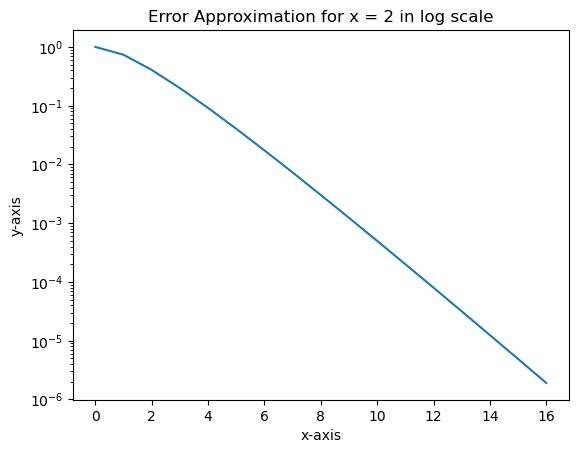

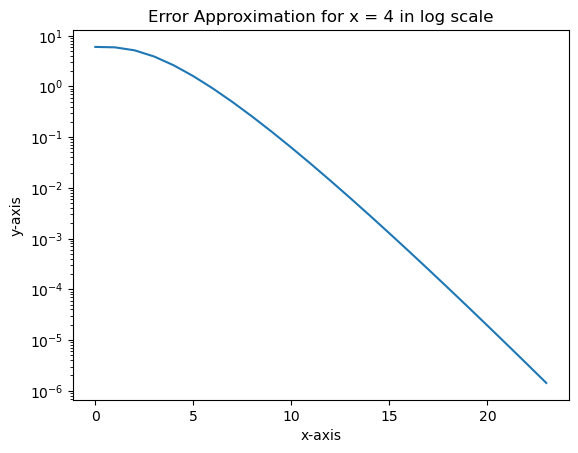

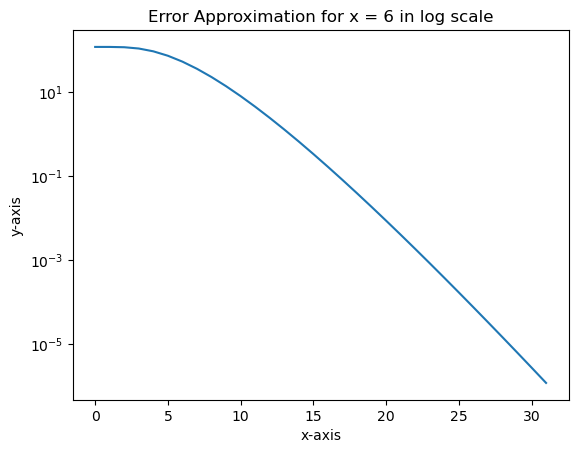

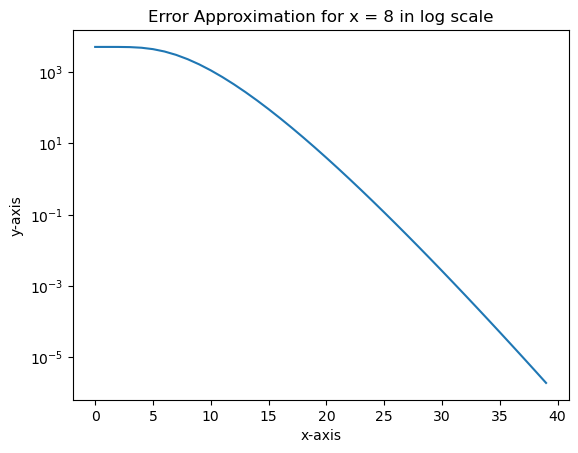

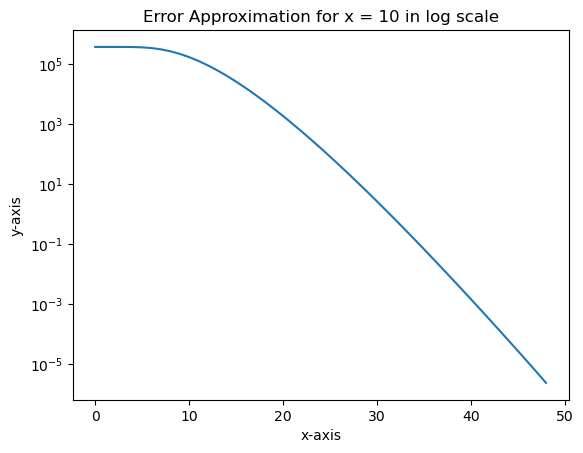

In [8]:
if __name__ == '__main__':
    tol = 1e-6
    timeout_start = time.time()

    for x in range(2, 11, 2):
        exactValue = math.factorial(x-1)
        i = 0
        xaxis = []
        yaxis = []
        while time.time() < timeout_start + timeout:
            a, b = 0, i
            f = lambda t: t**(x - 1) * math.e**(-t)
        
            approximation, intervals = adaptive_quad(f, a, b, trapezoidal, tol=1e-10)
            error = abs(exactValue - approximation)
            if error < tol:
                break
            #print(error)
            #print(i)
            xaxis.append(i)    
            yaxis.append(error)   
            
            i += 1
            
            
        plt.figure()
        plt.plot(xaxis, yaxis)
        plt.yscale("log")
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.title('Error Approximation for x = {} in log scale'.format(x))
        plt.show()
        timeout_start = time.time()

In [6]:
if __name__ == '__main__':

    for x in range(2, 11, 2):
        print("comparison between python gamma and our approximation of {}".format(x))
        exactValue = math.gamma(x)

        a, b = 0, 30
        f = lambda t: t**(x - 1) * math.e**(-t)
        
        approximation, intervals = adaptive_quad(f, a, b, trapezoidal, tol=1e-10)
        error = abs(exactValue - approximation)

        print(error)
        print("\n")

comparison between python gamma and our approximation of 2
7.89019960478754e-11


comparison between python gamma and our approximation of 4
1.7282628661519084e-09


comparison between python gamma and our approximation of 6
2.7056495923716284e-06


comparison between python gamma and our approximation of 8
0.0026377931608294602


comparison between python gamma and our approximation of 10
2.584340921661351


